<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [ ]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2024-12-11 21:06:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  41.5MB/s    in 3.8s    

2024-12-11 21:06:42 (39.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [4]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [5]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [16]:
median_compensation = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()
median_compensation

,Age,ConvertedCompYearly
0,18-24 years old,25000.0
1,25-34 years old,59825.0
2,35-44 years old,84796.0
3,45-54 years old,99099.0
4,55-64 years old,109691.0
5,65 years or older,106000.0
6,Prefer not to say,140000.0
7,Under 18 years old,7626.5


/tmp/ipykernel_569/3318203128.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_compensation = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()


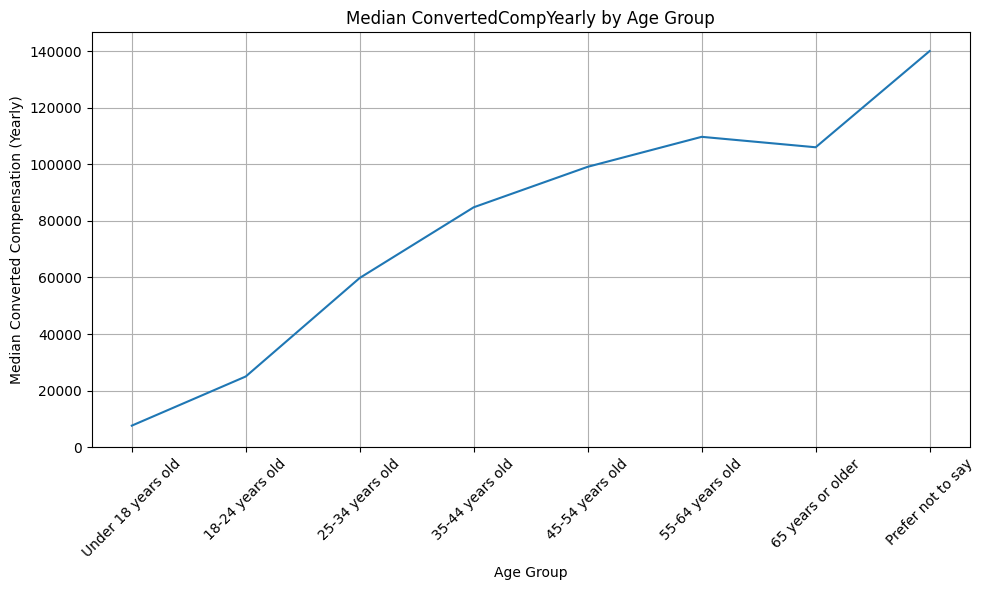

In [18]:
## Write your code here
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old', 
             '65 years or older', 'Prefer not to say']

# Make 'Age' a categorical column with the specified order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

median_compensation = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()
median_compensation = median_compensation.dropna(subset=['ConvertedCompYearly'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_compensation['Age'], median_compensation['ConvertedCompYearly'])

# Add title and labels
plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=45)  # Rotate age group labels for readability
plt.grid(True)

# Set the y-axis to start at 0
plt.ylim(bottom=0)  # This sets the lower limit of the y-axis to 0

# Show the plot
plt.tight_layout()
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


/tmp/ipykernel_569/1694204896.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_compensation = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reset_index()


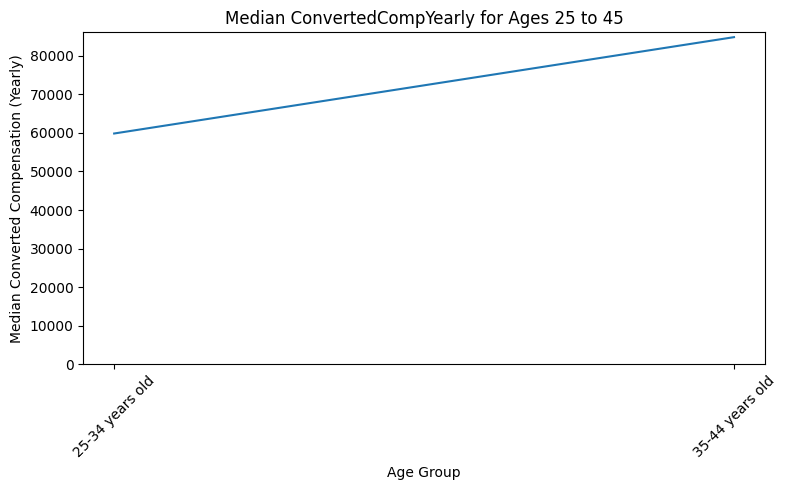

In [21]:
## Write your code here
df_filtered = df[df['Age'].isin(['25-34 years old', '35-44 years old'])]

# Group by 'Age' and calculate the median of 'ConvertedCompYearly'
median_compensation = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Drop rows where 'ConvertedCompYearly' is NaN (optional, depending on your needs)
median_compensation = median_compensation.dropna(subset=['ConvertedCompYearly'])

# Plotting the line chart
plt.figure(figsize=(8, 5))
plt.plot(median_compensation['Age'], median_compensation['ConvertedCompYearly'])

# Add title and labels
plt.title('Median ConvertedCompYearly for Ages 25 to 45')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=45)  # Rotate age group labels for readability

# Set the y-axis to start at 0
plt.ylim(bottom=0)  # This sets the lower limit of the y-axis to 0

# Show the plot
plt.tight_layout()
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



In [40]:
print(df.columns.to_list())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


/tmp/ipykernel_569/3074946593.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EdLevel'] = pd.Categorical(df_clean['EdLevel'], categories=experience_order, ordered=True)
/tmp/ipykernel_569/3074946593.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_satisfaction = df_clean.groupby('EdLevel')['JobSatPoints_6'].median().reset_index()


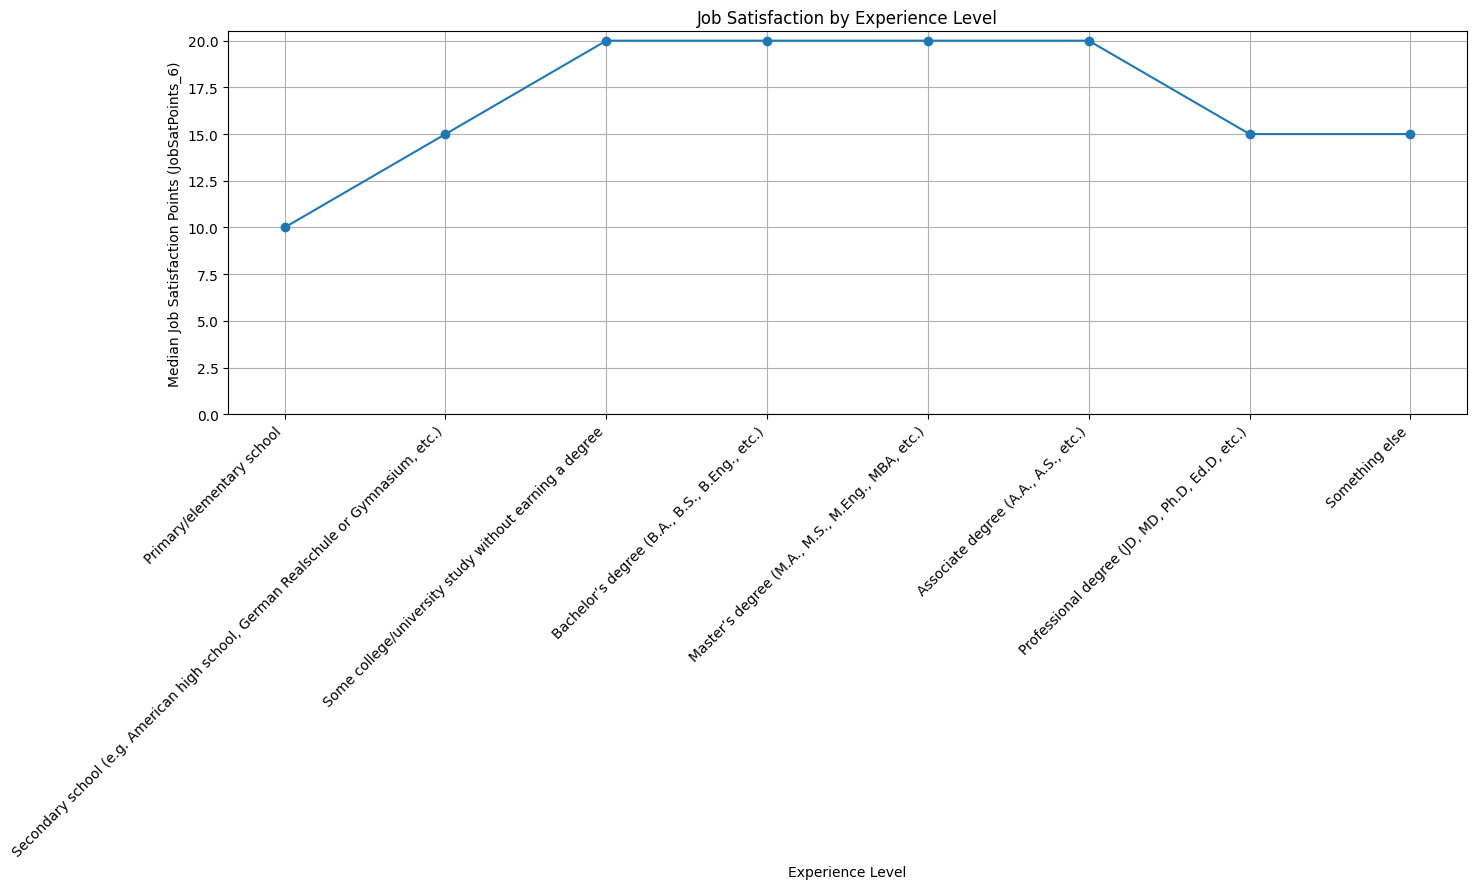

In [47]:
## Write your code here
# Clean the data
df_clean = df.dropna(subset=['JobSatPoints_6', 'EdLevel'])

# Group by 'Experience' and calculate the median of 'JobSatPoints_6'
median_job_satisfaction = df_clean.groupby('EdLevel')['JobSatPoints_6'].median().reset_index()

# Sort experience levels (optional if you want a specific order, otherwise the default is alphabetical)
experience_order = ['Primary/elementary school', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
                    'Some college/university study without earning a degree', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
                    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Associate degree (A.A., A.S., etc.)',
                    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'Something else']

# Make 'Experience' a categorical column with the specified order
df_clean['EdLevel'] = pd.Categorical(df_clean['EdLevel'], categories=experience_order, ordered=True)

# Group by 'Experience' again after sorting categories
median_job_satisfaction = df_clean.groupby('EdLevel')['JobSatPoints_6'].median().reset_index()

# Plotting the line chart
plt.figure(figsize=(15, 9))
plt.plot(median_job_satisfaction['EdLevel'], median_job_satisfaction['JobSatPoints_6'], marker='o')

# Add title and labels
plt.title('Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Job Satisfaction Points (JobSatPoints_6)')
plt.xticks(rotation=45, ha='right')  # Rotate experience level labels for readability
plt.grid(True)

# Set the y-axis to start at 0
plt.ylim(bottom=0)  # Set the lower limit of the y-axis to 0

# Show the plot
plt.tight_layout()
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


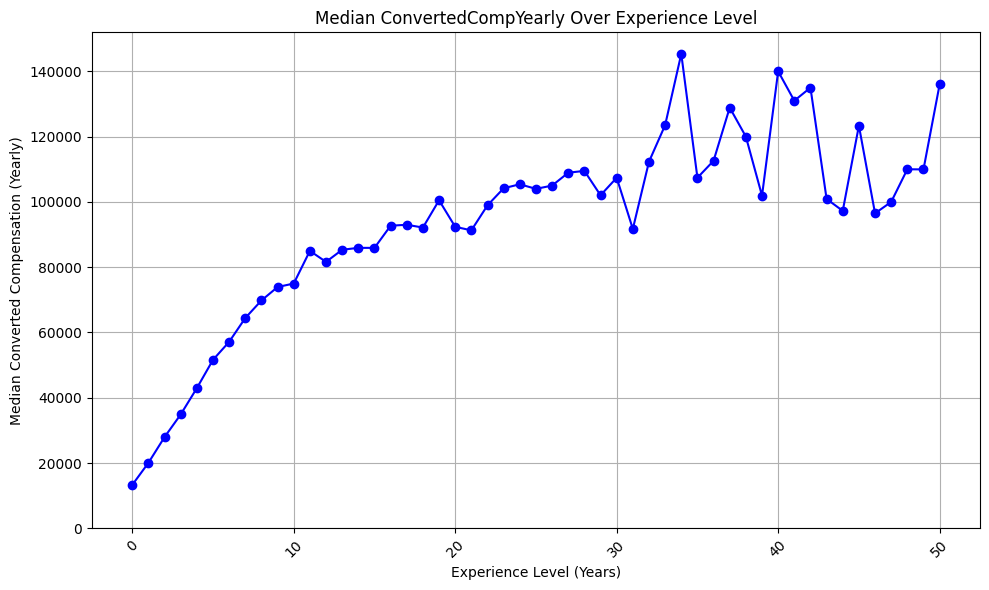

In [51]:
## Write your code here
# Handle missing data (if any)
df_clean_comp = df.dropna(subset=['ConvertedCompYearly', 'WorkExp'])

# Group by 'Experience' and calculate the median of 'ConvertedCompYearly'
median_compensation = df_clean_comp.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_compensation['WorkExp'], median_compensation['ConvertedCompYearly'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Median ConvertedCompYearly Over Experience Level')
plt.xlabel('Experience Level (Years)')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(True)

# Set the y-axis to start at 0
plt.ylim(bottom=0)  # This sets the lower limit of the y-axis to 0

# Show the plot
plt.tight_layout()
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
